# Assignment 4

In [44]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np 
import math 
import cv2
import os
import PIL
from PIL import Image
from imgaug import augmenters as iaa
import skimage 
from skimage import filters, feature

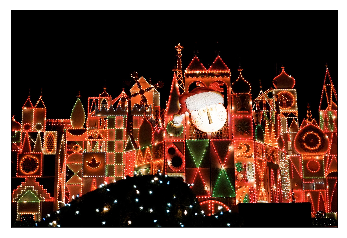

In [12]:
#Load and display image
img_path = r'/Users/abbychinn/Desktop/KB/csc481-image-processing/assignments/assignment-4/small-world-christmas.jpg'
# img_path = r'\Users\abbychinn\Desktop\KB\csc481-image-processing\assignments\assignment-4\small-world-christmas.jpg'
img = cv2.imread(img_path)  
#Convert to rgb
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
# #Hide axes 
plt.xticks([]), plt.yticks([])
plt.show()

______

## Problem 1  
Edge Detection (10/20)
Use the edge function to generate results for Roberts, Canny, Sobel, and Prewitt operators on an
image of your choice. Note also that the various edge functions support a number of parameters
– feel free to explore those to get more interesting results. State which operator gives the best
performance and why you think so.

In [19]:
#Greyscale image
img_grey = cv2.imread(img_path, 0)

#Roberts
roberts_img = filters.roberts(img_grey)

#Canny
canny_img1 = feature.canny(img_grey)
canny_img2 = feature.canny(img_grey, sigma = 3)

#Sobel
sobel_img = filters.sobel(img_grey)

#Prewitt
prewitt_img = filters.prewitt(img_grey)

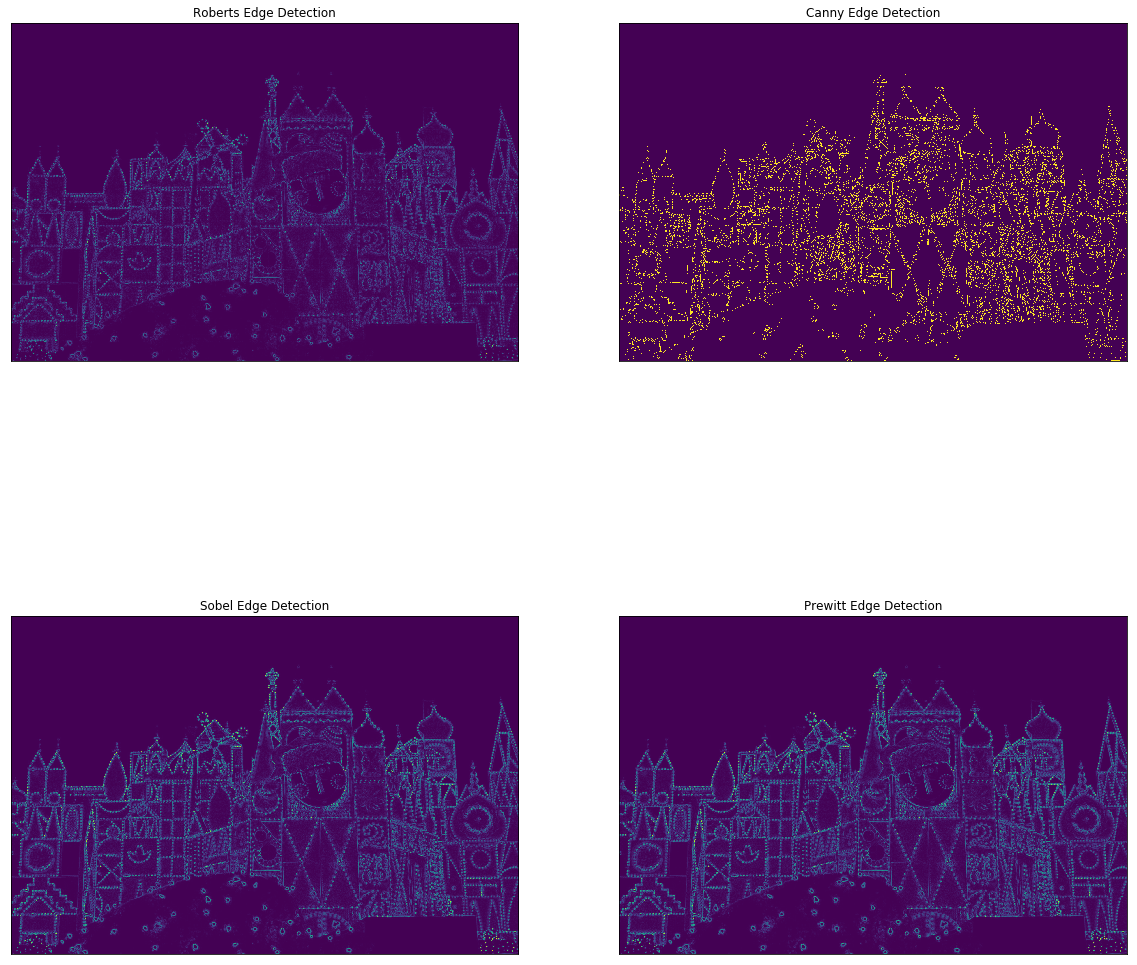

In [41]:
#Plotting blurred images
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [roberts_img, canny_img1, sobel_img, prewitt_img]
edges = ['Roberts', 'Canny', 'Sobel', 'Prewitt']

for i in range(rows * cols):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0} Edge Detection".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

________

## Problem 2  
Edge Filter (10/20)
Design a 7x7 “Sobel” operator and filter your image from the “Edge Detection” task above with
your filter. The main idea behind the design of a proper Sobel-ish operator is to model the
Gaussian derivate in one direction and the Gaussian in the perpendicular direction:
In this formulation, σ becomes a parameter of the filter; you can choose whatever you like,
although choosing 1 makes the math much simpler. x and y are the distance from the center
pixel of your filter. Aside from the size of your filter, how does it differ from the standard Sobel
operator? How are the image results different than what you saw applying the standard Sobel
operator?

In [72]:
#Create 7x7 
x = cv2.getDerivKernels(1, 0, 7)
y = cv2.getDerivKernels(0, 1, 7)

#Filter image 
sobelx_7x7 = cv2.Sobel(img_grey, -1, 1, 0, 7)
sobely_7x7 = cv2.Sobel(img_grey, -1, 0, 1, 7)

#Combined 7x7 
combined_sobel = sobelx_7x7 + sobely_7x7

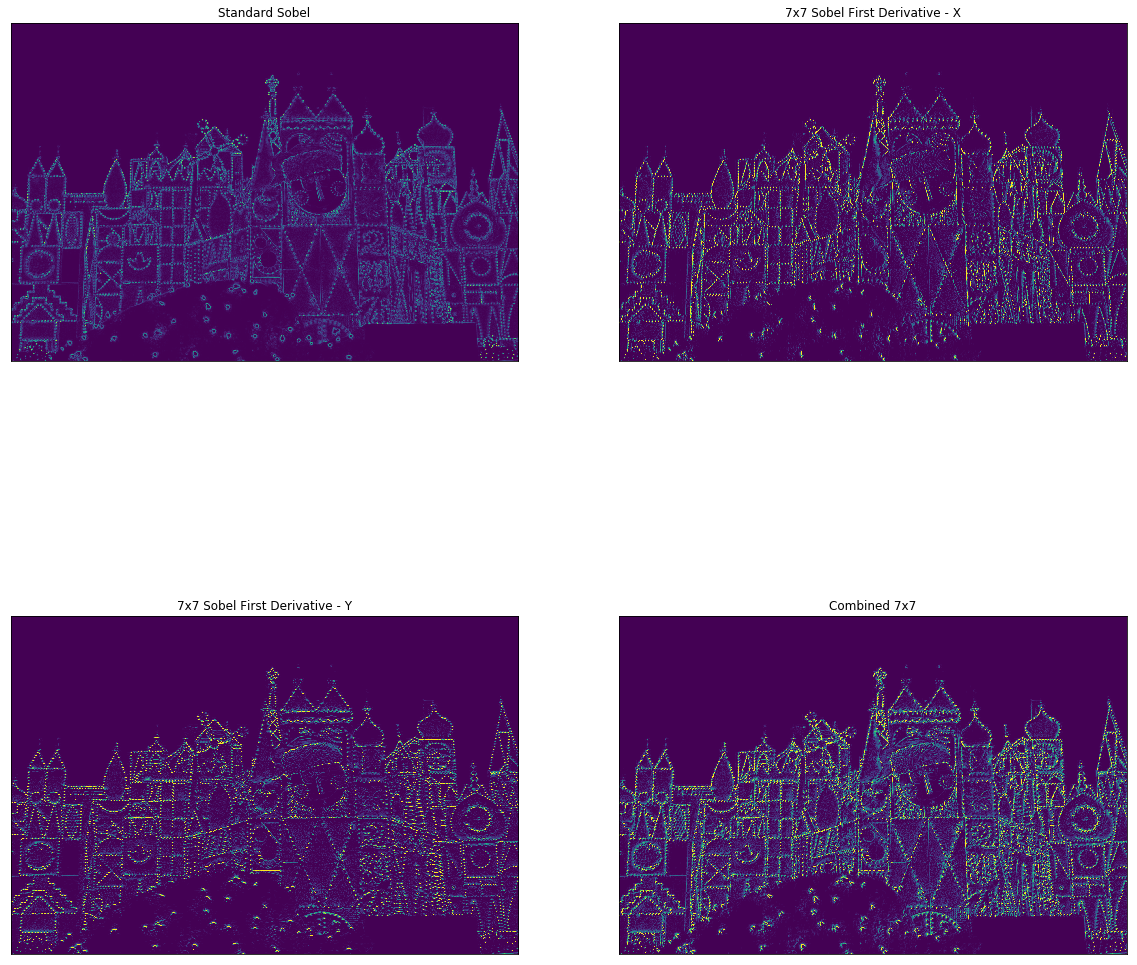

In [73]:
#Plotting sobel operators 
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [sobel_img, sobelx_7x7, sobely_7x7, combined_sobel]
edges = ['Standard Sobel', '7x7 Sobel First Derivative - X', '7x7 Sobel First Derivative - Y', 'Combined 7x7']

for i in range(rows * cols):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0}".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

#### Thoughts 
The 7x7 filter considers more pixels in the convolution process, blurring the edges of the image as the kernel size gets larger. This differs from the standard sobel since more than a single pixel is being calculate the gradeint which makes the first derivative gradient more sensitive to noise.

______

## Problem 3  
481 Students: Noise reduction (20/0)  
a) On an image of your choice, use the imnoise function to generate two noise corrupted
images as follows: (the article at https://stackoverflow.com/questions/14435632/impulsegaussian-and-salt-and-pepper-noise-with-opencv show one way to do this with Python
and openCV)
noise_gaussian =imnoise(Image,’gaussian’,0,0.05);
noise_saltAndpepper=imnoise(Image,’salt & pepper’, 0.02);  
b) Use subplot to display the original image and the two noise corrupted images.  
c) Use the function fspecial to design averaging filters of size (3x3), (5,5), and (7x7). Use
subplot to display the noise_saltAndpepper image and the three averaged filtered
results. Do the same for the noise_gaussian image.  
d) Use the medfilt2 function to perform median filtering on the noise_saltAndpepper
image. Design the median filters to work with window sizes of (3x3), (5x5), and (7x7). Use
your filters on the noise_gaussian image also and display as in part c)

### Part a

In [51]:
#Read image with pil
img_pil = Image.open(img_path)
img_arr = np.asarray(img_pil)

#Gaussian noise
gauss_aug = iaa.AdditiveGaussianNoise(loc = 0, scale = 0.1 * 255)
gauss_img = gauss_aug.augment_image(img_arr)
#Salt and pepper
salt_and_pepper = iaa.SaltAndPepper(p = 0.05)
salt_and_pepper_img = salt_and_pepper.augment_image(img_arr)

### Part b

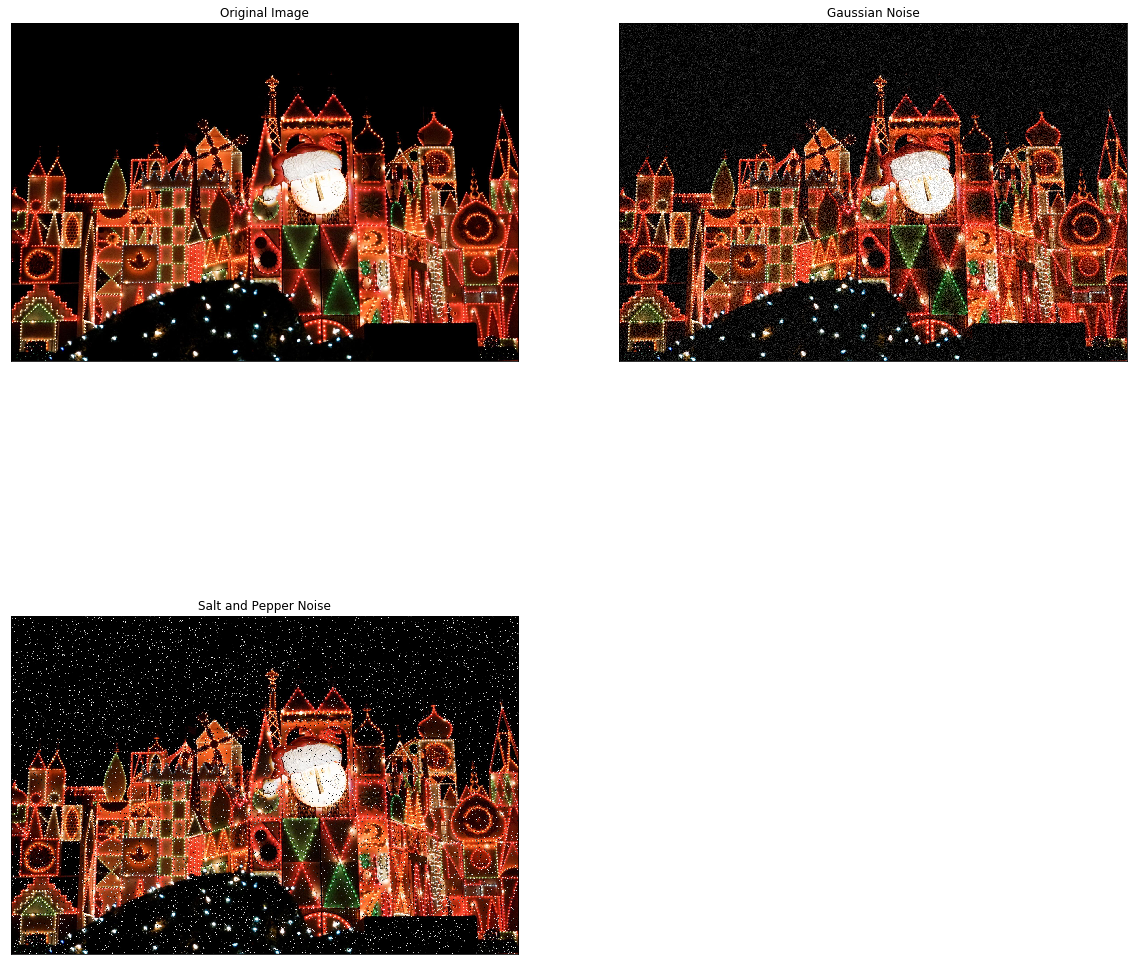

In [54]:
#Plotting noise plots
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [img2, gauss_img, salt_and_pepper_img]
edges = ['Original Image', 'Gaussian Noise', 'Salt and Pepper Noise']

for i in range((rows * cols) - 1):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0}".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

### Part c and d

In [68]:
#Filters
filter_sizes = [3, 5, 7]

#Gaussian
for filter_ in filter_sizes:
    gauss_avg_img = cv2.blur(gauss_img, (filter_, filter_))
    gauss_med_img = cv2.medianBlur(gauss_img, filter_)
    
#Salt and pepper
for filter_ in filter_sizes:
    s_p_avg_img = cv2.blur(salt_and_pepper_img, (filter_, filter_))
    s_p_med_img = cv2.medianBlur(img2, filter_)

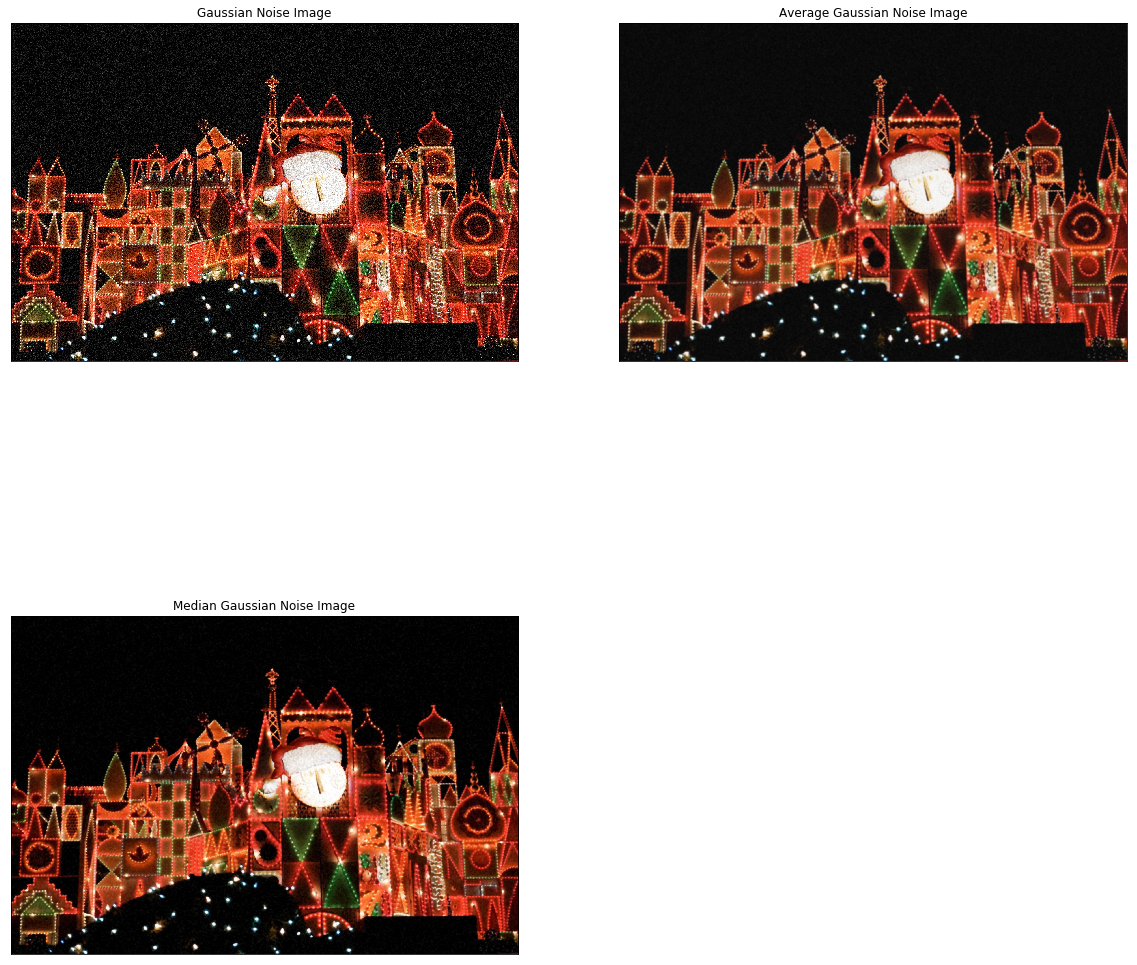

In [70]:
#Gaussian plots
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [gauss_img, gauss_avg_img, gauss_med_img]
edges = ['Gaussian Noise Image', 'Average Gaussian Noise Image', 'Median Gaussian Noise Image']

for i in range((rows * cols) - 1):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0}".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

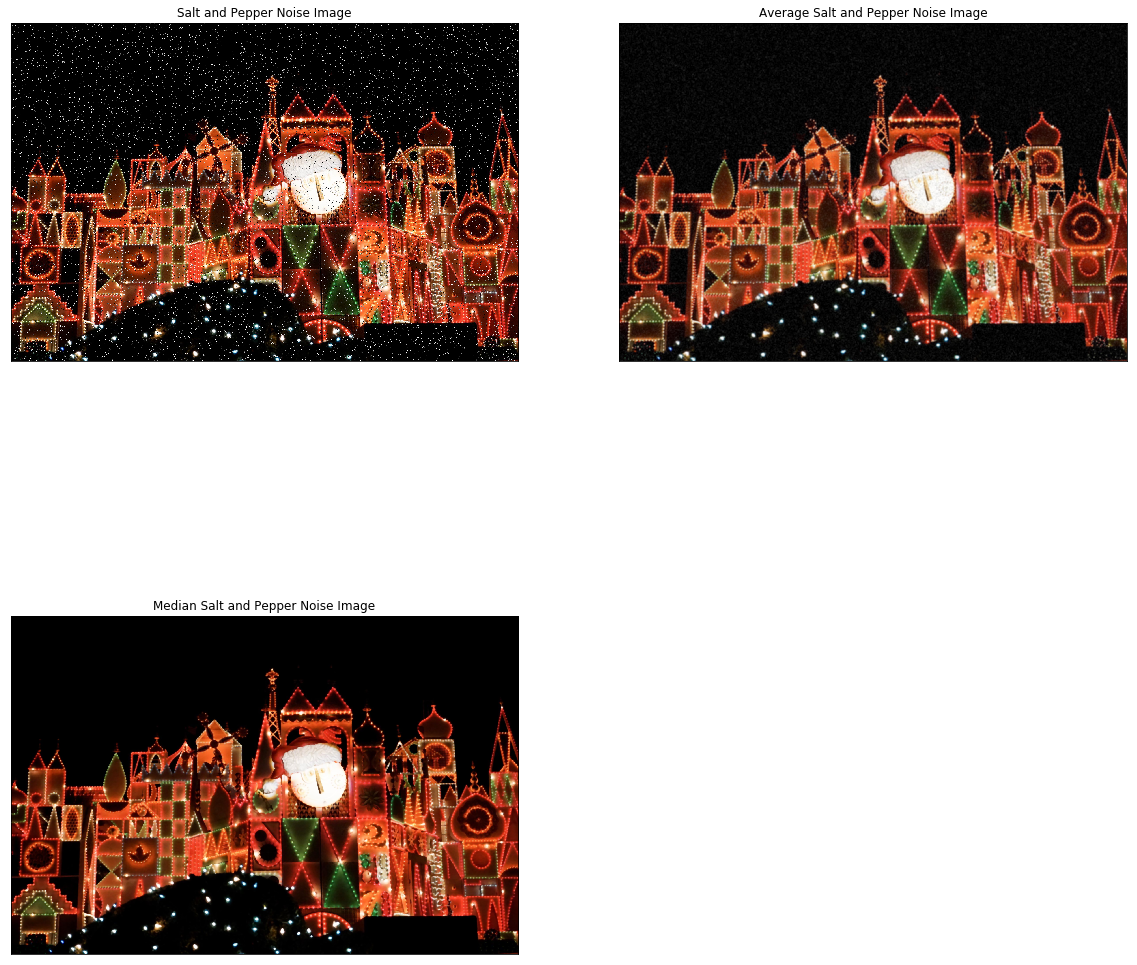

In [71]:
#Salt and pepper plots
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [salt_and_pepper_img, s_p_avg_img, s_p_med_img]
edges = ['Salt and Pepper Noise Image', 'Average Salt and Pepper Noise Image', 'Median Salt and Pepper Noise Image']

for i in range((rows * cols) - 1):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0}".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

_____